# FIFA  PLAYER  VALUE  PREDICTIONS



The purpose of this project is to take a dataset of European FIFA players and develop a multiple linear regression model that can predict the value of new players.

***Target Variable:*** Player Value

## The Data

The dataset is comprised of over 17,000 players.  The dataset came with approximately 90 features, some of which are identifiers for the player including jersey number and date of birth while other features dig into their performance as a player in a wide variety of skills.

## The Regression Model

We will use an OLS (Ordinary Least Squares) model, which is designed to minimize the amount of error (distance between the line and the data points when graphed) to increase it's predictive power.  We split the dataset into a training set (a random sample of 80% of the data) to fit the model and then used a test set of the remaining data to evaluate the model's accuracy.

## The Process

* ***Import & Cleaning***
    *   Imported the .CSV file as a Pandas DataFrame.
    *   Checked for data types and removed any unnecessary features that contained string data.
    *   Identified Null values and either removed them or transformed them into an appropriate value.
    *   Identified categorical data and either dropped it or transformed it into numerical dummy variables.
    *   Removed the top and bottom 2.5% of the dataset (the extreme outliers), which created unnecessary variance.  

* ***Check Correlation***
    *   Checked for correlations between the target variable and the features to get an initial sense of which features have an influence on the target variable.
    *   Checked for correlations between features which would cause multicollinearity.  If two features are highly corrletated, then you really only need one of the two.  Having both could negatively impact the accuracy of your other coefficients.
    *   Make a note of any features you want to keep an eye on and possibly drop when improving your model.

* ***Normalization***
    *   One of the basic assumptions of linear regression is that the data is normally distributed.  If the data isn't normally distriuted, then you shouldn't use a linear regression model.  If the data is close to normal, but could be better, then you can transform the data using log transformations.
    *   The log of a number is basically a reverse exponent.  Conducting a log transformation acorss a column, makes all the numbers uniformly smaller and puts it into a tighter scale.  This shifts how the data is distributed on a graph, possibly making it more normal.
    *   DETERMINATION
    
* ***Standardization***
    *   Stardization is similar to normalization in that you are transforming the data into common units. There may be a great deal of difference between the units of features.  Some data points, like year, have very high numberical units compared to number of bathrooms, which is very low.  You don't want some coefficients to be weighted higher simply because they are using a different unit of measurement.  To solve this, you can onvert each data point into its z-score and then compare the data's z-scores.
    *   DETERMINATION

* ***Split the Data***
    *  Before you train the model, you should split the data into a training set and a test set.  This will allow us to build a model and then test its predictive strength using real data.
    *  Train, Validation, and Test

* ***Build OLS Model***
    *  Build the first model using the training set.
    *  Get the summary statistics and look for ways to improve. Specifically look at the RMSE, R-Squared and Adj. R-Squared as well as the p-values for each coefficient to determine which are really useful.
    *  Record the summary statistics for each model you generate as well as the specific characteristics of the model that produced those results.

* ***Regularization***
    *   The purpose of regularization is to avoid over and underfitting a model to the training set and to find the right balance between complexity and generalizability.  If the model is too complex, meaning it can't generalize to new data, then you need to reduce that complexity.
    *   There are two methods for regularization: Ridge & Lasso.  Both add an argument at the end of the regression equation that sums all of the coefficients, squares that sum and then uses this number to penalize any coefficients that are too extreme.
    *   Ridge regularization minimizes the impact of extreme coefficients.  Lasso goes a step further to determines which features are strongest and then zeros out the weakest features.  This is useful when you have a long list of features and you need to determine which are best.
    *   DETERMINATION
    
* ***Polynomial***
    *   The purpose of
    *   DETERMINATION


## Results

Insert the table of results for each variation of the OLS and determine which performed the best.



*Only European and Spanish Clubs

## Import Packages

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="white")
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# Import .CSV

In [2]:
df = pd.read_csv('fifa_cleaned.csv', index_col=0)

In [10]:
pd.set_option('display.max_columns', None)
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [7]:
df.shape

(17954, 91)

In [9]:
df.dtypes

name           object
full_name      object
birth_date     object
age             int64
height_cm     float64
               ...   
LB             object
LCB            object
CB             object
RCB            object
RB             object
Length: 91, dtype: object

In [4]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'release_clause_euro', 'club_team', 'club_rating', 'club_position',
       'club_jersey_number', 'club_join_date', 'contract_end_year',
       'national_team', 'national_rating', 'national_team_position',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_divi

# Drop Unecessary Columns & Datatypes

In [13]:
df = df.drop(['full_name', 'birth_date', 'positions', 'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type', 'club_jersey_number', 'club_join_date', 'contract_end_year', 'national_jersey_number', 'tags', 'traits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'], axis=1)

In [15]:
df

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,226500000.0,FC Barcelona,86.0,RW,Argentina,82.0,RF,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,133800000.0,Tottenham Hotspur,83.0,LCM,Denmark,78.0,CAM,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,144200000.0,Manchester United,82.0,LCM,France,84.0,RDM,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,105400000.0,Napoli,82.0,LS,Italy,83.0,LW,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,106500000.0,Napoli,82.0,LCB,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204322,R. McKenzie,25,175.26,74.8,Scotland,67,70,975000.0,3000.0,Right,1800000.0,Kilmarnock,67.0,SUB,NaN,NaN,NaN,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18,15,11,15,12,7
239762,M. Sipľak,23,182.88,79.8,Slovakia,59,67,190000.0,1000.0,Left,295000.0,Cracovia,65.0,LB,NaN,NaN,NaN,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60,15,7,7,15,8
235155,J. Bekkema,22,185.42,89.8,Netherlands,59,67,170000.0,1000.0,Right,289000.0,SC Heerenveen,69.0,RES,NaN,NaN,NaN,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13,63,57,50,58,63


In [14]:
df.shape

(17954, 51)

# Identify Null Values

We identified several columns with null values.  We removed any observations that didn't contain the player's value and/or wage.  We also update the null values in the release clause column to zeros.

In [16]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                  255
wage_euro                   246
preferred_foot                0
release_clause_euro        1837
club_team                    14
club_rating                  14
club_position                14
national_team             17097
national_rating           17097
national_team_position    17097
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [27]:
df.dropna(subset=['value_euro'], inplace=True)

In [28]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                    0
wage_euro                     0
preferred_foot                0
release_clause_euro        1582
club_team                     0
club_rating                   0
club_position                 0
national_team             16842
national_rating           16842
national_team_position    16842
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [39]:
df['release_clause_euro'].fillna(0, inplace=True)

In [40]:
df.isnull().sum()

name                          0
age                           0
height_cm                     0
weight_kgs                    0
nationality                   0
overall_rating                0
potential                     0
value_euro                    0
wage_euro                     0
preferred_foot                0
release_clause_euro           0
club_team                     0
club_rating                   0
club_position                 0
national_team             16842
national_rating           16842
national_team_position    16842
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
freekick_accuracy             0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance 

In [54]:
df['national_team'].fillna(0, inplace=True)

In [56]:
df['national_rating'].fillna(0, inplace=True)

In [57]:
df['national_team_position'].fillna(0, inplace=True)

In [58]:
df.isnull().sum()

name                      0
age                       0
height_cm                 0
weight_kgs                0
nationality               0
overall_rating            0
potential                 0
value_euro                0
wage_euro                 0
preferred_foot            0
release_clause_euro       0
club_team                 0
club_rating               0
club_position             0
national_team             0
national_rating           0
national_team_position    0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
freekick_accuracy         0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength            

In [59]:
df.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot             object
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position              object
national_team              object
national_rating           float64
national_team_position     object
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

In [41]:
df.shape

(17699, 51)

# Dummy Variables for Categorical Data

In [78]:
cleanup_nationalposition  = { 'national_team_position': {'': 0, 'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26, 'SUB': 27, 'GK': 28, 'RES': 29}}

In [79]:
df.replace(cleanup_nationalposition, inplace=True)
df.head(100)

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,226500000.0,FC Barcelona,86.0,RW,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,133800000.0,Tottenham Hotspur,83.0,LCM,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,144200000.0,Manchester United,82.0,LCM,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,105400000.0,Napoli,82.0,LS,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,106500000.0,Napoli,82.0,LCB,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201455,G. Kondogbia,26,187.96,79.8,Central African Rep.,81,84,22000000.0,43000.0,Left,47900000.0,Valencia CF,80.0,LCM,0,0.0,0,65,69,75,81,62,78,62,56,79,83,69,76,76,83,67,86,81,78,91,80,82,79,77,79,45,82,78,82,82,15,10,10,8,10
202562,J. Roussillon,26,175.26,79.8,France,81,83,18000000.0,50000.0,Left,32000000.0,VfL Wolfsburg,77.0,LB,0,0.0,0,81,64,71,77,57,79,75,56,70,79,87,85,77,76,78,75,73,84,77,65,75,77,71,71,51,75,75,84,79,9,7,13,8,15
202685,S. Zaza,27,185.42,83.9,Italy,81,82,21000000.0,48000.0,Left,0.0,Torino,77.0,RS,0,0.0,0,52,80,79,71,81,77,71,56,45,79,77,79,76,78,69,85,89,76,88,72,87,40,83,66,79,72,54,42,50,7,13,9,7,9


In [80]:
df['national_team_position'].astype(int)

id
158023     7
190460    10
195864    20
198219     4
201024     0
          ..
204322     0
239762     0
235155     0
244883     0
247187     0
Name: national_team_position, Length: 17699, dtype: int64

In [82]:
cleanup_clubposition  = { 'club_position': {'': 0, 'LS':1, 'ST':2, 'RS':3,'LW':4, 'LF':5, 'CF':6, 'RF':7, 'RW':8, 'LAM':9, 'CAM':10, 'RAM':11, 'LM':12, 'LCM':13, 'CM':14,
       'RCM':15, 'RM':16, 'LWB':17, 'LDM':18, 'CDM':19, 'RDM':20, 'RWB':21, 'LB':22, 'LCB':23, 'CB':24,
       'RCB':25, 'RB':26, 'SUB': 27, 'GK': 28, 'RES': 29}}

In [83]:
df.replace(cleanup_clubposition, inplace=True)
df.head()

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,Left,226500000.0,FC Barcelona,86.0,8,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,Right,133800000.0,Tottenham Hotspur,83.0,13,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,Right,144200000.0,Manchester United,82.0,13,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,Right,105400000.0,Napoli,82.0,1,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,Right,106500000.0,Napoli,82.0,23,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5


In [84]:
df['club_position'].astype(int)

id
158023     8
190460    13
195864    13
198219     1
201024    23
          ..
204322    27
239762    22
235155    29
244883    29
247187    29
Name: club_position, Length: 17699, dtype: int64

In [90]:
cleanup_foot  = { 'preferred_foot': {'Left': 0, 'Right':1}}

In [91]:
df.replace(cleanup_foot, inplace=True)
df.head()

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,170.18,72.1,Argentina,94,94,110500000.0,565000.0,0,226500000.0,FC Barcelona,86.0,8,Argentina,82.0,7,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
190460,C. Eriksen,27,154.94,76.2,Denmark,88,89,69500000.0,205000.0,1,133800000.0,Tottenham Hotspur,83.0,13,Denmark,78.0,10,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6
195864,P. Pogba,25,190.50,83.9,France,88,91,73000000.0,255000.0,1,144200000.0,Manchester United,82.0,13,France,84.0,20,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3
198219,L. Insigne,27,162.56,59.0,Italy,88,88,62000000.0,165000.0,1,105400000.0,Napoli,82.0,1,Italy,83.0,4,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10
201024,K. Koulibaly,27,187.96,88.9,Senegal,88,91,60000000.0,135000.0,1,106500000.0,Napoli,82.0,23,0,0.0,0,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5


In [92]:
df['preferred_foot'].astype(int)

id
158023    0
190460    1
195864    1
198219    1
201024    1
         ..
204322    1
239762    0
235155    1
244883    1
247187    1
Name: preferred_foot, Length: 17699, dtype: int64

In [93]:
df.dtypes

name                       object
age                         int64
height_cm                 float64
weight_kgs                float64
nationality                object
overall_rating              int64
potential                   int64
value_euro                float64
wage_euro                 float64
preferred_foot              int64
release_clause_euro       float64
club_team                  object
club_rating               float64
club_position               int64
national_team              object
national_rating           float64
national_team_position      int64
crossing                    int64
finishing                   int64
heading_accuracy            int64
short_passing               int64
volleys                     int64
dribbling                   int64
curve                       int64
freekick_accuracy           int64
long_passing                int64
ball_control                int64
acceleration                int64
sprint_speed                int64
agility       

# Removing Outliers

In [147]:
upper_q = df['value_euro'].quantile(.975)
upper_q

15500000.0

In [149]:
df = df[df['value_euro'] < upper_q]

In [150]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000,17244.000000
mean,25.507249,174.917680,75.265037,65.787578,71.079796,1772110.879146,7626.188819,0.767861,2886307.701229,69.050220,23.577128,2.784737,0.836407,49.291000,44.906460,51.902401,58.129378,42.271863,54.839596,46.630248,42.249246,52.231211,57.780909,64.459348,64.579564,63.128624,61.298075,63.702563,54.911389,64.867548,62.834667,65.037926,46.366910,55.568546,46.399791,49.415971,52.930875,47.992983,58.161389,46.900719,47.535317,45.552772,16.757829,16.526792,16.360705,16.507365,16.845338
std,4.724861,14.036025,7.069842,6.498466,5.749665,2642629.102425,11729.535338,0.422209,4909870.283825,4.768506,7.141166,14.169844,4.481395,18.238946,19.343458,17.365943,14.590862,17.424745,18.826434,18.187541,17.251894,15.174607,16.570682,14.966944,14.708657,14.730356,8.628994,14.121082,17.122957,11.671074,15.834511,12.514806,19.131417,17.303048,20.598646,19.395324,13.787531,15.603520,11.259169,19.875513,21.515166,21.116706,17.772524,16.989182,16.603635,17.096348,18.051880
min,17.000000,152.400000,49.900000,47.000000,50.000000,10000.000000,1000.000000,0.000000,0.000000,54.000000,1.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,11.000000,24.000000,16.000000,2.000000,15.000000,12.000000,20.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,325000.000000,1000.000000,1.000000,371000.000000,65.000000,23.000000,0.000000,0.000000,37.000000,29.000000,44.000000,53.000000,30.000000,48.000000,34.000000,30.000000,42.000000,53.000000,57.000000,57.000000,55.000000,55.000000,56.000000,45.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,38.000000,44.000000,38.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,675000.000000,3000.000000,1.000000,960000.000000,69.000000,27.000000,0.000000,0.000000,54.000000,48.000000,55.000000,62.000000,43.000000,61.000000,48.000000,41.000000,56.000000,62.000000,67.000000,67.000000,65.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,50.000000,58.000000,52.000000,55.000000,55.000000,49.000000,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,70.000000,75.000000,1800000.000000,8000.000000,1.000000,2600000.000000,72.000000,27.000000,0.000000,0.000000,63.000000,61.000000,64.000000,68.000000,56.000000,68.000000,61.000000,56.000000,64.000000,68.000000,75.000000,75.000000,74.000000,67.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,63.000000,60.000000,66.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.

In [152]:
lower_q = df['value_euro'].quantile(.025)
lower_q

70000.0

In [153]:
df = df[df['value_euro'] > lower_q]

In [154]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,25.546189,174.901355,75.262720,66.193610,71.366579,1826599.258107,7828.826134,0.765047,2974548.641857,69.192773,23.457999,2.873041,0.862929,49.925512,45.528240,52.479538,58.739978,42.824997,55.552710,47.223106,42.749013,52.777193,58.505205,64.957521,65.090822,63.611463,61.689841,63.967752,55.538590,65.090762,63.434067,65.325954,47.035300,56.041103,46.867476,50.062822,53.366758,48.487316,58.645148,47.353476,48.005624,45.958059,16.418452,16.195405,16.035778,16.191217,16.516693
std,4.614207,14.016655,7.059060,6.116421,5.544978,2666146.415346,11857.309139,0.423982,4961642.628273,4.721876,7.207314,14.383950,4.549382,17.975675,19.125980,17.047260,14.177677,17.237687,18.402648,17.987821,17.128490,14.899235,16.062203,14.610043,14.329912,14.460503,8.354678,13.976503,16.819332,11.603270,15.446067,12.437261,18.864945,17.129766,20.518586,19.090666,13.649908,15.372395,10.940728,19.769324,21.429273,21.073104,17.508305,16.703094,16.315941,16.840751,17.795218
min,17.000000,152.400000,49.900000,51.000000,55.000000,80000.000000,1000.000000,0.000000,0.000000,54.000000,1.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,11.000000,24.000000,16.000000,2.000000,15.000000,12.000000,20.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,350000.000000,1000.000000,1.000000,420000.000000,66.000000,22.000000,0.000000,0.000000,39.000000,30.000000,45.000000,54.000000,30.000000,50.000000,34.000000,31.000000,44.000000,55.000000,58.000000,58.000000,56.000000,56.000000,56.000000,46.000000,58.000000,57.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,52.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,700000.000000,3000.000000,1.000000,1000000.000000,69.000000,27.000000,0.000000,0.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,68.000000,68.000000,66.000000,62.000000,66.000000,59.000000,66.000000,67.000000,67.000000,51.000000,59.000000,53.000000,55.000000,55.000000,49.000000,60.000000,53.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,1900000.000000,8000.000000,1.000000,2700000.000000,72.000000,27.000000,0.000000,0.000000,64.000000,61.000000,64.000000,68.000000,56.000000,68.000000,61.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,66.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14

In [155]:
df.shape

(16714, 51)

In [156]:
corr = df.corr()

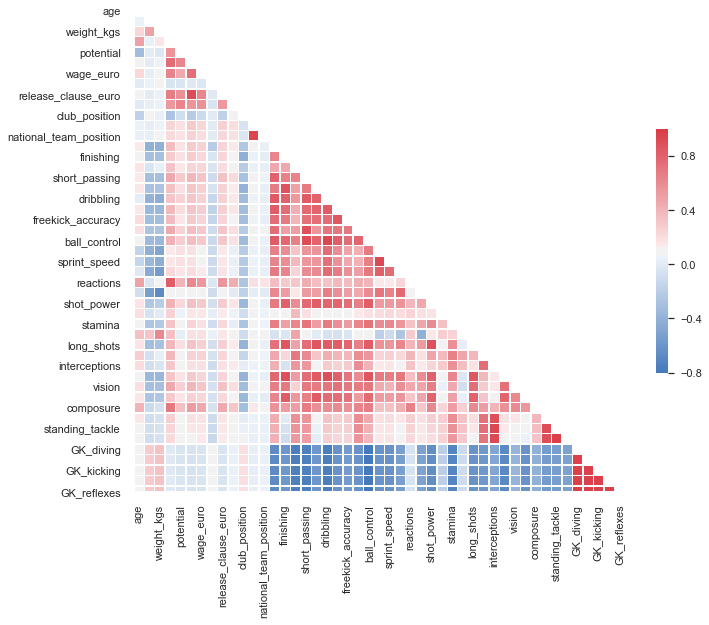

In [157]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [158]:
corr

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
age,1.000000,0.049838,0.226949,0.495486,-0.318880,0.113762,0.218830,0.006052,0.098508,-0.003542,-0.171383,0.049740,0.048246,0.138309,0.074622,0.161786,0.140817,0.151654,0.016129,0.154437,0.204937,0.191117,0.092278,-0.154246,-0.147383,-0.012353,0.487912,-0.083337,0.165268,0.190760,0.116210,0.340330,0.168331,0.274728,0.206357,0.091655,0.194306,0.151961,0.403141,0.151597,0.125775,0.110199,0.090840,0.093444,0.094134,0.102552,0.092596
height_cm,0.049838,1.000000,0.491692,0.038037,0.011873,0.011228,0.023896,0.049293,0.010247,0.030774,0.079460,0.021764,0.032710,-0.395796,-0.299348,-0.033863,-0.298350,-0.281867,-0.390132,-0.350948,-0.317228,-0.269668,-0.337108,-0.412542,-0.357548,-0.446345,-0.023634,-0.534362,-0.240220,-0.052446,-0.254393,0.322840,-0.309960,-0.069852,-0.075752,-0.358288,-0.297524,-0.271411,-0.119387,-0.086526,-0.077557,-0.082971,0.288260,0.288464,0.284323,0.288701,0.289733
weight_kgs,0.226949,0.491692,1.000000,0.159726,-0.023173,0.061307,0.085505,0.073220,0.051462,0.055793,0.041042,0.059794,0.063540,-0.402805,-0.299505,0.038831,-0.302007,-0.268051,-0.424362,-0.354256,-0.308539,-0.267972,-0.350600,-0.489464,-0.421955,-0.543700,0.084770,-0.668650,-0.198994,0.004965,-0.229760,0.616740,-0.283487,0.029431,-0.028627,-0.361201,-0.295745,-0.252952,-0.049719,-0.052219,-0.049678,-0.060404,0.335225,0.334297,0.333536,0.336607,0.336022
overall_rating,0.495486,0.038037,0.159726,1.000000,0.557055,0.750368,0.638179,-0.036517,0.666618,0.538763,-0.270268,0.237390,0.216911,0.352693,0.286312,0.318710,0.456691,0.344073,0.322973,0.377660,0.360345,0.446959,0.409089,0.141922,0.155210,0.219236,0.829870,0.071378,0.403528,0.254556,0.324599,0.347956,0.382973,0.381482,0.307741,0.312213,0.452838,0.301793,0.691230,0.272834,0.239310,0.214838,-0.009272,-0.009353,-0.011424,-0.000914,-0.008039
potential,-0.318880,0.011873,-0.023173,0.557055,1.000000,0.631890,0.460909,-0.030654,0.574282,0.632217,-0.080717,0.186045,0.169134,0.172172,0.177512,0.148052,0.291330,0.178989,0.247297,0.204368,0.159264,0.248192,0.274512,0.180090,0.180307,0.159583,0.400680,0.103082,0.218559,0.060972,0.120550,0.027755,0.190770,0.113391,0.106799,0.175378,0.265219,0.158272,0.339067,0.121678,0.108174,0.100402,-0.037047,-0.037754,-0.041451,-0.035517,-0.037554
value_euro,0.113762,0.011228,0.061307,0.750368,0.631890,1.000000,0.739722,-0.013961,0.902766,0.562664,-0.216637,0.291903,0.253603,0.286845,0.284054,0.239896,0.380785,0.313321,0.314566,0.323290,0.290467,0.352580,0.358489,0.179811,0.187304,0.207301,0.617287,0.108645,0.342366,0.156112,0.249504,0.177341,0.326856,0.254362,0.187221,0.294477,0.392840,0.264620,0.520337,0.175825,0.154740,0.132637,-0.048306,-0.050326,-0.051112,-0.046876,-0.049415
wage_euro,0.218830,0.023896,0.085505,0.638179,0.460909,0.739722,1.000000,-0.014451,0.625217,0.564473,-0.112549,0.236574,0.208578,0.254495,0.224623,0.232236,0.320186,0.269523,0.254216,0.277181,0.243149,0.298816,0.299363,0.104970,0.117061,0.146304,0.535355,0.068605,0.294286,0.154351,0.183780,0.179566,0.273121,0.250774,0.189477,0.241894,0.321653,0.238814,0.460319,0.173908,0.156390,0.142703,-0.040620,-0.040885,-0.042198,-0.038082,-0.041244
preferred_foot,0.006052,0.049293,0.073220,-0.036517,-0.030654,-0.013961,-0.014451,1.000000,-0.012808,-0.036970,0.004945,0.000181,0.000550,-0.205765,-0.035503,-0.039280,-0.100476,-0.045374,-0.130263,-0.158078,-0.145573,-0.104768,-0.114421,-0.112974,-0.111494,-0.103211,-0.015473,-0.092678,-0.071000,0.026239,-0.088235,0.044559,

In [97]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'release_clause_euro', 'club_team', 'club_rating',
       'club_position', 'national_team', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes'],
      dtype='object')

In [100]:
all_features = ['age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'club_rating', 'club_position', 'national_rating',
       'national_team_position', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes']

In [101]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [all_features[i:i+n] for i in range(0, len(all_features), n)]

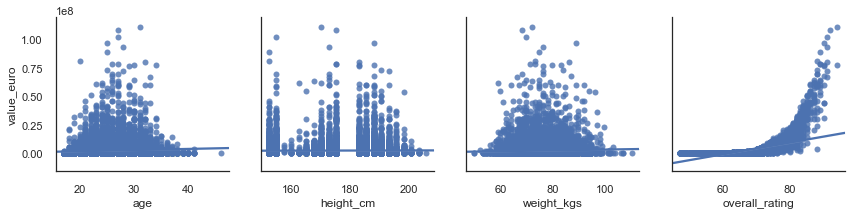

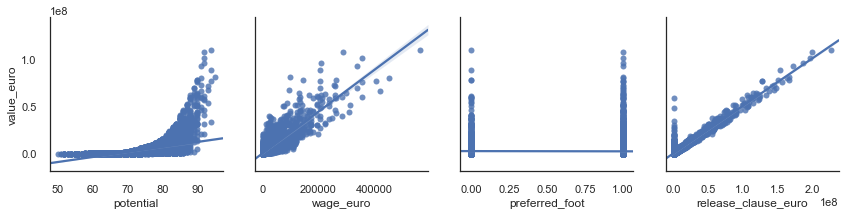

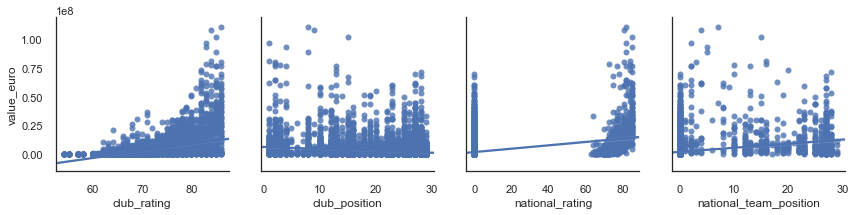

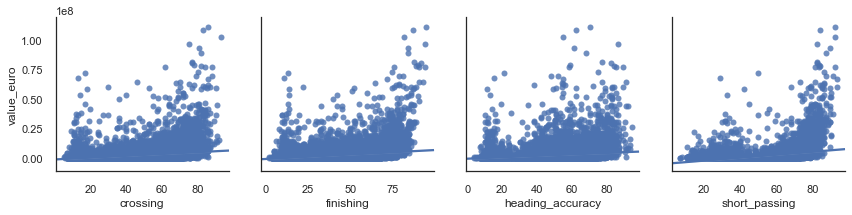

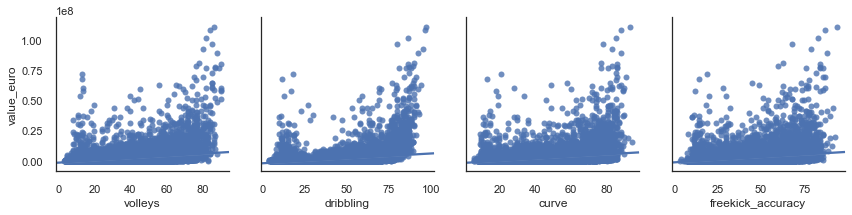

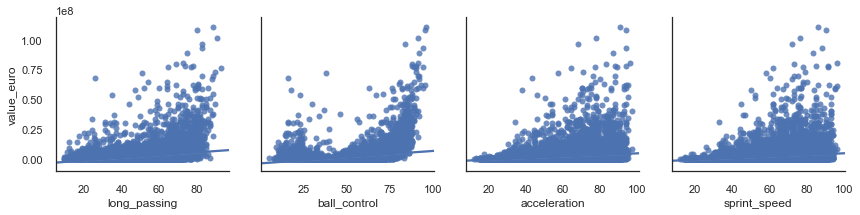

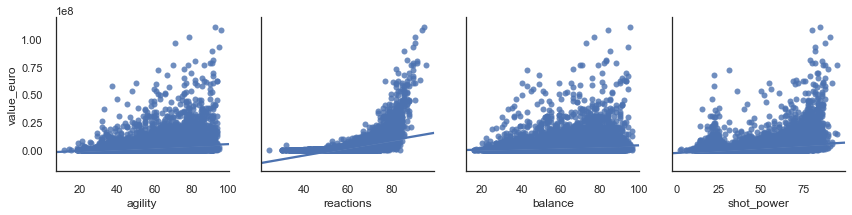

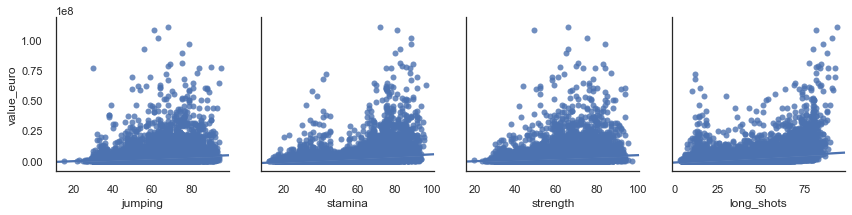

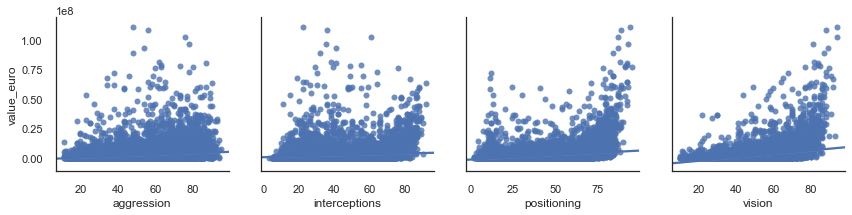

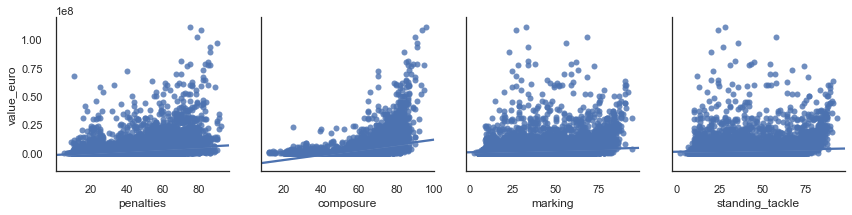

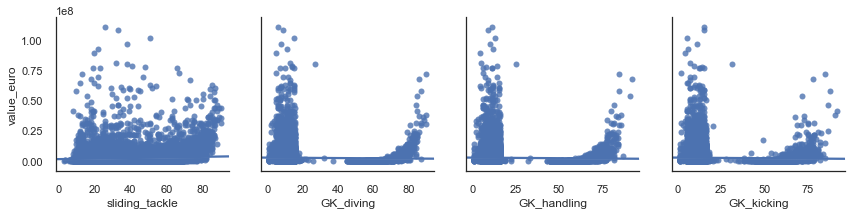

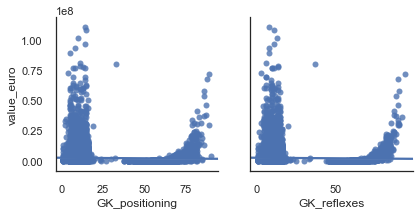

In [103]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['value_euro'],x_vars=i, kind="reg", height=3)

In [145]:
df['height_cm'].describe()

count   17699.000000
mean      174.930355
std        14.036180
min       152.400000
25%       154.940000
50%       175.260000
75%       185.420000
max       205.740000
Name: height_cm, dtype: float64

# Hypothesis Tests

Is there is a difference in the value between right footed and left footed players?

***Null Hypothesis***: there is not a statistically significant difference between the value of right and left footed players.

***Alternative Hypothesis***: there is a statistically significant difference between the value of right and left footed players.

We used a two-sample, two-tailed independent T-test to determine if there is or is not a difference between the value of the two groups.

We started by determining the sample size requirements to achieve an effect size of 0.8 and a power of 0.8 with an alpha value of 0.025.

In [135]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.8
alpha = 0.025 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

30.994809182633027

According to these calculations, we need a sample size of at least 31 observations to achieve our ideal statistical power.  Fortunately, we have 17699 observations in our data set so we will be able to meet this requirement.

In [137]:
from scipy.stats import ttest_ind
foot_df = df[['value_euro','preferred_foot']]
left = foot_df[foot_df['preferred_foot']==0]
right = foot_df[foot_df['preferred_foot']==1]

t_score, pvalue = ttest_ind(left['value_euro'],right['value_euro'], equal_var= False)

print("P-value",float(pvalue))
print("t-Score",float(t_score))

alpha= 0.025
if pvalue<alpha:
    print("reject null hypothesis")
else:
    print("fail to reject the null hypothesis")

P-value 0.02806382089903773
t-Score 2.1968892475632797
fail to reject the null hypothesis


Based on the results of this two-tailed t-test, we determined that there isn't a statistically significant difference between the value of right and left footed players.  The average value of left footed players is higher than the average value of right footed players, but the difference is not large enough.

In [129]:
df[df['preferred_foot'] == 0].max()

name                        Óscar Whalley
age                                    40
height_cm                      203.200000
weight_kgs                      98.900000
nationality                      Zimbabwe
overall_rating                         94
potential                              94
value_euro               110500000.000000
wage_euro                   565000.000000
preferred_foot                          0
release_clause_euro      226500000.000000
club_team                   Śląsk Wrocław
club_rating                     86.000000
club_position                          29
national_rating                 85.000000
national_team_position                 29
crossing                               90
finishing                              95
heading_accuracy                       91
short_passing                          93
volleys                                90
dribbling                              97
curve                                  93
freekick_accuracy                 

In [124]:
pd.set_option('float_format', '{:f}'.format)
df[df['preferred_foot'] == 0].describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000,4120.000000
mean,25.508738,173.673733,74.362354,66.818932,71.899757,2656160.194175,10574.029126,0.000000,4538900.485437,69.719903,23.305340,3.763592,1.053641,56.648301,46.904612,53.563835,61.392961,44.490291,59.933981,52.534951,47.483738,55.702427,61.874029,67.910437,67.915777,66.299515,62.248058,66.330825,57.767961,64.514806,65.840049,64.256796,49.756311,57.612136,50.462864,53.323544,55.102427,50.206068,59.920146,50.953641,52.080583,50.364320,13.452670,13.343447,13.185922,13.279854,13.429126
std,4.563854,13.688113,6.901427,6.583671,6.093302,5990822.703542,23509.098109,0.000000,11576506.688979,5.142088,6.764335,16.612369,4.935396,16.188149,17.532722,14.390736,12.280852,16.251555,15.520664,17.476770,17.354458,13.526387,13.444622,13.019696,12.713549,13.396782,8.781208,13.320667,15.888038,11.785708,13.382904,12.502549,17.873835,15.330669,18.880609,16.491405,13.450337,13.928563,10.490087,17.873229,19.497793,19.511802,12.955793,12.471818,12.150545,12.625484,13.189353
min,17.000000,152.400000,49.900000,47.000000,53.000000,10000.000000,1000.000000,0.000000,0.000000,54.000000,1.000000,0.000000,0.000000,8.000000,5.000000,7.000000,11.000000,4.000000,6.000000,6.000000,3.000000,10.000000,8.000000,15.000000,15.000000,19.000000,32.000000,16.000000,9.000000,27.000000,12.000000,28.000000,5.000000,12.000000,6.000000,4.000000,10.000000,9.000000,13.000000,5.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,154.940000,69.900000,63.000000,68.000000,400000.000000,2000.000000,0.000000,445500.000000,66.000000,22.000000,0.000000,0.000000,49.000000,33.000000,46.000000,57.000000,32.000000,55.000000,40.000000,34.000000,48.000000,58.000000,63.000000,63.000000,59.000000,57.000000,59.000000,48.000000,58.000000,60.000000,57.000000,36.000000,48.000000,35.000000,46.000000,46.000000,41.000000,53.000000,37.000000,35.000000,33.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,175.260000,73.900000,67.000000,72.000000,775000.000000,4000.000000,0.000000,1100000.000000,69.000000,27.000000,0.000000,0.000000,61.000000,49.000000,55.000000,64.000000,45.000000,63.000000,55.000000,46.000000,58.000000,64.000000,70.000000,70.000000,68.000000,63.000000,68.000000,61.000000,65.000000,68.000000,65.000000,53.000000,60.000000,56.000000,57.000000,56.000000,50.000000,60.000000,56.000000,60.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,78.900000,71.000000,76.000000,2400000.000000,10000.000000,0.000000,3300000.000000,73.000000,27.000000,0.000000,0.000000,67.000000,61.000000,63.000000,69.000000,57.000000,70.000000,66.000000,62.000000,65.000000,70.000000,76.000000,76.000000,76.000000,68.000000,75.000000,69.000000,72.000000,75.000000,73.000000,64.000000,69.000000,65.000000,65.000000,65.000000,61.000000,67.000000,65.000000,67.000000,66.000000,14.000000,14.000000,13.000000,13.000000,14.000000
max,40.000000,

In [125]:
pd.set_option('float_format', '{:f}'.format)
df[df['preferred_foot'] == 1].describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_rating,club_position,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000
mean,25.541056,175.311627,75.571750,66.045659,71.313131,2425613.079019,9702.260844,1.000000,4109354.149790,69.237646,23.461963,3.676191,1.046616,47.618013,44.917520,51.727815,57.739009,42.250534,53.920539,45.503572,41.241108,51.751749,57.167980,63.735400,63.882097,62.527948,61.665292,63.130643,54.611091,65.131379,62.326165,65.450328,45.988659,55.295972,45.511378,48.852493,52.942485,47.782679,58.293468,46.003756,46.418808,44.296635,17.747036,17.485603,17.308712,17.473231,17.869136
std,4.736758,14.118489,7.117503,7.079352,6.140800,5590695.020055,21518.617727,0.000000,10624488.372186,5.073376,7.406893,16.363468,4.967856,18.598552,20.191489,18.316307,15.423642,18.197315,19.815304,18.518546,17.361727,15.806516,17.601784,15.424671,15.158344,15.090624,9.176137,14.348374,17.672874,11.692674,16.500272,12.524971,19.775240,17.911806,21.147597,20.438083,14.275920,16.266414,11.911558,20.474679,22.100220,21.573329,18.975160,18.123470,17.689399,18.224268,19.269745
min,17.000000,152.400000,49.900000,47.000000,50.000000,10000.000000,1000.000000,1.000000,0.000000,54.000000,1.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,5.000000,12.000000,12.000000,11.000000,24.000000,16.000000,2.000000,15.000000,12.000000,20.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,162.560000,69.900000,62.000000,67.000000,300000.000000,1000.000000,1.000000,365500.000000,65.000000,23.000000,0.000000,0.000000,35.000000,28.000000,44.000000,52.000000,29.000000,46.000000,32.000000,29.000000,41.000000,52.000000,55.000000,55.000000,54.000000,55.000000,55.000000,44.000000,58.000000,55.000000,58.000000,30.000000,42.000000,24.000000,35.000000,43.000000,38.000000,51.000000,28.000000,24.000000,22.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,182.880000,74.800000,66.000000,71.000000,675000.000000,3000.000000,1.000000,961000.000000,69.000000,27.000000,0.000000,0.000000,52.000000,48.000000,56.000000,62.000000,43.000000,60.000000,47.000000,40.000000,55.000000,62.000000,67.000000,67.000000,65.000000,62.000000,65.000000,58.000000,66.000000,66.000000,67.000000,50.000000,58.000000,50.000000,55.000000,55.000000,49.000000,59.000000,51.000000,53.000000,49.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2000000.000000,9000.000000,1.000000,2800000.000000,72.000000,27.000000,0.000000,0.000000,62.000000,62.000000,65.000000,68.000000,56.000000,67.000000,60.000000,54.000000,64.000000,69.000000,75.000000,74.000000,73.000000,68.000000,73.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,63.000000,66.000000,63.000000,14.000000,14.000000,14

In [126]:
df[df['value_euro'] == 108000000.00]

,name,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,release_clause_euro,club_team,club_rating,club_position,national_team,national_rating,national_team_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
190871,Neymar Jr,27,175.260000,68.000000,Brazil,92,92,108000000.000000,290000.000000,1,199800000.000000,Paris Saint-Germain,84.000000,9,Brazil,81.000000,4,83,87,62,84,84,96,88,87,80,95,94,90,96,94,84,80,61,81,49,82,56,36,89,88,81,94,27,24,33,9,9,15,15,11


In [119]:
left_foot_val = float(2.656160e+06)

In [120]:
left_foot_val

2656160.0

In [121]:
right_foot_val = float(2.425613e+06)
right_foot_val

2425613.0

In [134]:
df[df['preferred_foot'] == 1].mean()

age                           25.541056
height_cm                    175.311627
weight_kgs                    75.571750
overall_rating                66.045659
potential                     71.313131
value_euro               2425613.079019
wage_euro                   9702.260844
preferred_foot                 1.000000
release_clause_euro      4109354.149790
club_rating                   69.237646
club_position                 23.461963
national_rating                3.676191
national_team_position         1.046616
crossing                      47.618013
finishing                     44.917520
heading_accuracy              51.727815
short_passing                 57.739009
volleys                       42.250534
dribbling                     53.920539
curve                         45.503572
freekick_accuracy             41.241108
long_passing                  51.751749
ball_control                  57.167980
acceleration                  63.735400
sprint_speed                  63.882097


In [ ]:
fig, ax = plt.subplots() # Plot a bar-chart of gold medals as a function of country
ax.bar(['CT','NJ','NY'],grp_states['PHYSHLTH'].mean()) # Set the x-axis tick labels to the country names
ax.set_xlabel('States') # Set the y-axis label
ax.set_ylabel('Days')
ax.set_title('Sick Days')
plt.show()

In [ ]:
print('\nPlayer Values by Preferred Foot: \n')
print(round(df['preferred_foot'][df[''] == 'Yes'].value_counts()/main_df['MaritalStatus'].value_counts()*100,2))
(main_df['MaritalStatus'][main_df['Attrition'] == 'Yes'].value_counts()/main_df['MaritalStatus'].value_counts()*100).plot.bar(color = 'blue')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


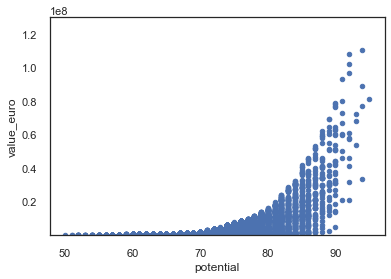

In [142]:
var = 'potential'
data = pd.concat([df['value_euro'], df[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,130000000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


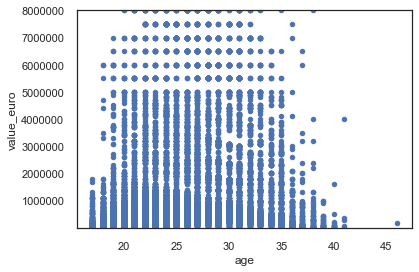

In [46]:
var = 'age'
data = pd.concat([df['value_euro'], df[var]], axis=1)
data.plot.scatter(x=var, y='value_euro', ylim=(3,8000000));

In [43]:
df['value_euro'].plot

In [143]:
poten_df = df.loc[:,('potential', 'preferred_foot')]

In [144]:
top_perform 


,potential,preferred_foot
id,,
158023,94,0
190460,89,1
195864,91,1
198219,88,1
201024,91,1
...,...,...
204322,70,1
239762,67,0
235155,67,1


In [ ]:
poten_df = df.loc[:,('potential', 'preferred_foot')]

df2.groupby(df2[df2[‘popularity’] > 1000.0].index, inplace = True)